# Binary Classification with a Bank Churn Dataset

### 1º Paso: Importamos las librerías básicas y necesarias en casi todo proyecto de Data Science.

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestClassifier
import warnings 
warnings.filterwarnings('ignore')

### 2º Paso: Cargamos los datasets de entrenamiento y prueba en dos objetos DataFrame.

In [62]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

### Paso 3: EDA (Análisis Exploratorio de Datos): Realizaremos un análisis exploratorio de datos para obtener una comprensión inicial de las características y estructuras de los datos, identificar patrones, detectar anomalías y resumir las relaciones entre las variables.

In [63]:
df_train.head(5)


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [64]:
df_test.head(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [65]:
print("Size of Train DataFrame:", df_train.shape)
df_train.shape

print("Size of Test DataFrame:", df_test.shape)
df_test.shape

Size of Train DataFrame: (165034, 14)
Size of Test DataFrame: (110023, 13)


(110023, 13)

* Removemos las columnas que son redundantes o que no aportan información en el DataFrame.

In [66]:
df_train.drop(['id','CustomerId','Surname'],axis=1,inplace=True)
df_test.drop(['id','CustomerId','Surname'],axis=1,inplace=True)

In [67]:
print(df_train.columns)
print(df_test.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')
Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


* Data summary

Resumen estadístico de las columnas numéricas del DataFrame.

In [68]:
df_train.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [69]:
df_test.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000
mean,656.530789,38.122205,4.996637,55333.611354,1.553321,0.753043,0.495233,112315.147765
std,80.315415,8.861550,2.806148,62788.519675,0.544714,0.431244,0.499980,50277.048244
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74440.325000
50%,660.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117832.230000
75%,710.000000,42.000000,7.000000,120145.605000,2.000000,1.000000,1.000000,154631.350000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000


Se puede concluir lo siguiente:

1. **CreditScore**:
   - La mayor parte de los puntajes de crédito están centrados alrededor de la media con una dispersión moderada.

2. **Age (Edad)**:
   - La mayoría de los clientes están en la mediana edad, con algunos clientes más jóvenes y otros bastante mayores.

3. **Tenure (Antigüedad)**:
   - La distribución de la antigüedad parece ser bastante uniforme.

4. **Balance**:
   - Un cuarto de los clientes no tienen saldo (percentil 25 = 0), pero algunos tienen saldos muy altos.

5. **NumOfProducts (Número de Productos)**:
   - La mayoría de los clientes tienen 1 o 2 productos.

6. **HasCrCard (Tiene Tarjeta de Crédito)**:
   - La mayoría de los clientes tienen una tarjeta de crédito (mediana = 1).

7. **IsActiveMember (Es Miembro Activo)**:
   - La mitad de los clientes son miembros activos.

8. **EstimatedSalary (Salario Estimado)**:
   - Los salarios estimados están bastante distribuidos con algunos valores muy altos.

9. **Exited (Abandonó el servicio)**:
   - Aproximadamente el 21% de los clientes han abandonado el servicio.

En resumen, los datos presentan una variedad de valores y distribuciones. Por ejemplo, aunque la mayoría de los clientes tienen saldos bajos o nulos y usan pocos productos, existen clientes con saldos y número de productos bastante altos. La mitad de los clientes tienen tarjetas de crédito y son miembros activos. La edad de los clientes varía desde jóvenes hasta mayores, con una mayoría en la mediana edad. Además, un porcentaje significativo de clientes ha dejado el servicio, lo cual podría ser un punto de interés para análisis adicionales.

In [70]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB


In [71]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      110023 non-null  int64  
 1   Geography        110023 non-null  object 
 2   Gender           110023 non-null  object 
 3   Age              110023 non-null  float64
 4   Tenure           110023 non-null  int64  
 5   Balance          110023 non-null  float64
 6   NumOfProducts    110023 non-null  int64  
 7   HasCrCard        110023 non-null  float64
 8   IsActiveMember   110023 non-null  float64
 9   EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 8.4+ MB


No hay valores nulos en los conjuntos de datos, pero es posible que sea necesaria alguna transformación más adelante.

* Se verifica la unicidad de los valores

In [72]:
df_train.nunique()


CreditScore          457
Geography              3
Gender                 2
Age                   71
Tenure                11
Balance            30075
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary    55298
Exited                 2
dtype: int64

In [73]:
estimate = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
for i in estimate:
    print(df_train[i].value_counts())

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64
Gender
Male      93150
Female    71884
Name: count, dtype: int64
NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64
HasCrCard
1.0    124428
0.0     40606
Name: count, dtype: int64
IsActiveMember
0.0    82885
1.0    82149
Name: count, dtype: int64


* Verificar el equilibrio de la variable objetivo.

0 Percentage: 78.84 %
1 Percentage: 21.16 %
Difference between 0 and 1: 57.68 %


<function matplotlib.pyplot.show(close=None, block=None)>

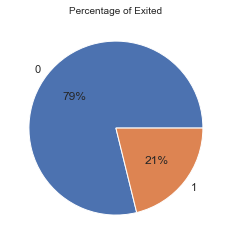

In [74]:
# Train DataSet
proporcion_0 = round(df_train.Exited[df_train.Exited == 0].count() / len(df_train)*100, 2)
proporcion_1 = round(df_train.Exited[df_train.Exited == 1].count() / len(df_train)*100, 2)
print("0 Percentage:", proporcion_0,"%")
print("1 Percentage:", proporcion_1, "%")
print("Difference between 0 and 1:", round(proporcion_0 - proporcion_1, 2), "%")
#df_train.groupby('Exited').count()

# Vizualization
plt.figure(figsize=(6,4))
df_train['Exited'].value_counts().plot(kind='pie',autopct='%0.0f%%')
plt.title('Percentage of Exited', fontsize=10)
plt.ylabel('')
plt.show

Las clases presentan un desequilibrio en el conjunto de datos. Abordaremos algunas estrategias para mitigar este problema, ya que puede afectar el rendimiento del modelo.

* Análisis univariado

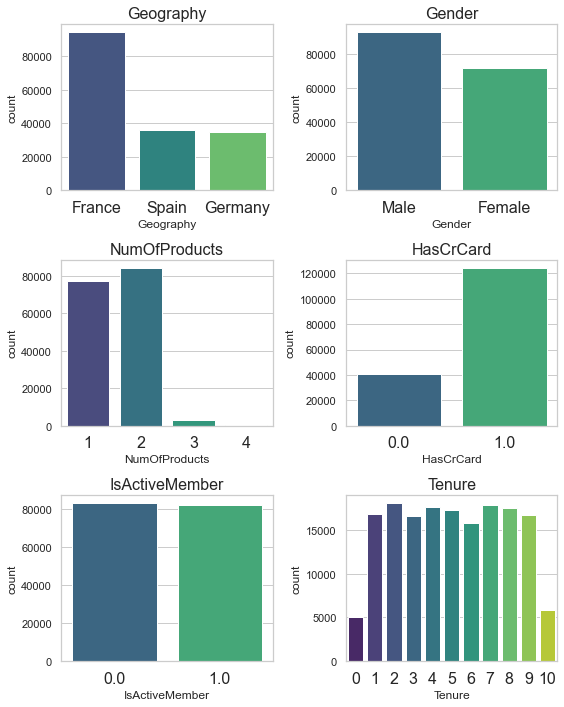

In [75]:
col_count = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Tenure']

# Size of the fig
plt.figure(figsize=(8, 16))

# Iteration
for index, col in enumerate(col_count, 1):
    plt.subplot(5, 2, index) 
    sns.countplot(x=col, data=df_train, palette='viridis')
    plt.xticks(fontname="Arial", fontsize=16)
    plt.title(col, fontsize = 16)

# Display the figure
plt.tight_layout()
plt.show()

Análisis de los datos:
1. Distribución por país:

Francia: Domina la base de usuarios, lo que sugiere una fuerte presencia en este mercado. Es crucial comprender las razones detrás de esta concentración, ya sea por estrategias de marketing efectivas, mayor afinidad con el producto o servicio en la región, o factores externos como la competencia o las tendencias del mercado.

2. Distribución por género:

Leve desequilibrio hacia los hombres: Se observa una ligera predominancia de usuarios masculinos. Es importante analizar las causas de este desequilibrio para determinar si se debe a factores demográficos, preferencias de uso, estrategias de marketing o una combinación de estos.

3. Propiedad de productos:

Concentración en uno o dos productos: La mayoría de los usuarios poseen entre uno y dos productos. Esto podría indicar que el producto o servicio satisface necesidades básicas o que existen barreras para la adopción de más productos. Se recomienda analizar las razones detrás de esta tendencia e implementar estrategias para incentivar la compra de productos adicionales, como ofertas, programas de fidelización o campañas de marketing personalizadas.

4. Tenencia de tarjetas de crédito:

Mayoría con tarjetas de crédito: La mayoría de los clientes posee una tarjeta de crédito, lo que facilita las transacciones y podría indicar un poder adquisitivo favorable. Es importante segmentar a los clientes en función de su uso de la tarjeta de crédito para optimizar las estrategias de marketing y ventas.

5. Actividad de los clientes:

Mitad de los clientes activos: La mitad de la base de clientes está activa, lo que significa que la otra mitad no interactúa con el producto o servicio de manera regular. Es crucial analizar las razones de esta inactividad e implementar estrategias de reactivación para recuperar a estos clientes.

6. Antigüedad de los usuarios:

Minoría de usuarios recientes: Los usuarios con menos de un año y más de diez añso son minoría, mientras que el resto presenta una distribución uniforme. Esto podría indicar una rápida captación de usuarios al inicio, seguida de un crecimiento más lento o una base de usuarios establecida. Se recomienda analizar las tendencias de adquisición de usuarios en diferentes períodos para identificar patrones y optimizar las estrategias de captación.
En general, los datos revelan información valiosa sobre la distribución de usuarios, el comportamiento de compra, la actividad y la antigüedad. 

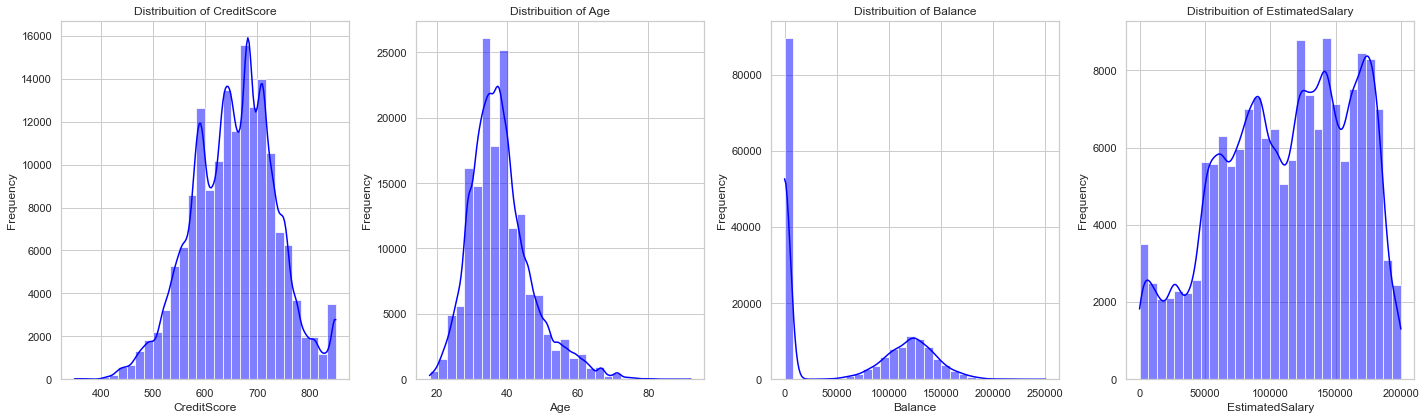

In [76]:
col_hist = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Graph style
sns.set(style="whitegrid")

# Subplots for each variable
fig, axes = plt.subplots(nrows=1, ncols=len(col_hist), figsize=(20, 6))

# Iteration
for i, variable in enumerate(col_hist):
    sns.histplot(df_train[variable], kde=True, ax=axes[i], color='blue', bins=30)
    axes[i].set_title(f'Distribuition of {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Algunas observaciones:

CreditScore: Tiene una ligera asimetría hacia la izquierda, aunque está bastante cerca de una distribución simétrica.

Age: Indica que la distribución de la edad está fuertemente sesgada hacia la derecha, lo que significa que hay más individuos jóvenes en el conjunto de datos y menos individuos mayores.

Balance: Implica que hay más cuentas con saldos más altos.

EstimatedSalary: Sugiere que a medida que aumenta el número de individuos, los salarios también aumentan; hay más clientes con buenos salarios.

* Análisis Bivariado

Columnas numericas

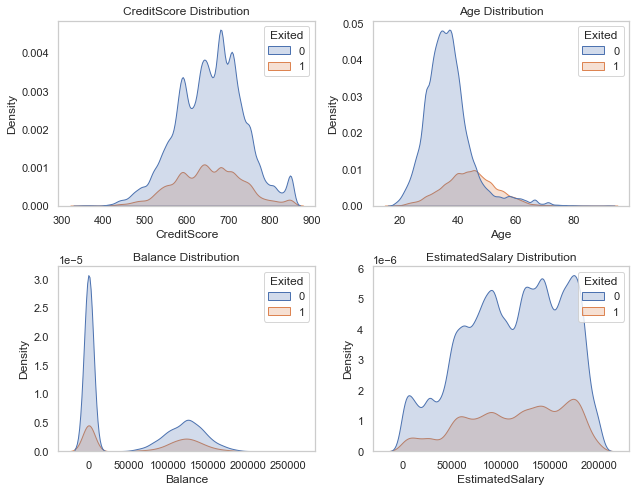

In [77]:
count = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Calcular el número de filas necesario para las subtramas
num_rows = (len(count) + 1) // 2

# Crear subtramas
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(9, 7))

# Iterar sobre las variables y trazar KDE plots
for idx, column in enumerate(count):
    row_idx = idx // 2
    col_idx = idx % 2
    sns.kdeplot(x=column, hue='Exited', data=df_train, ax=axes[row_idx, col_idx], fill=True)
    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_title(f"{column} Distribution")
    axes[row_idx, col_idx].grid(False)  # Desactivar la cuadrícula

# Ajustar el diseño y mostrar
plt.tight_layout()
plt.show()


Aquí se ha podido ver los valores del histograma anterior, pero en el gráfico de densidad, lo que nos permite observar la distribución por etiqueta también.

Distribución de las variables continuas en función de la variable objetivo.

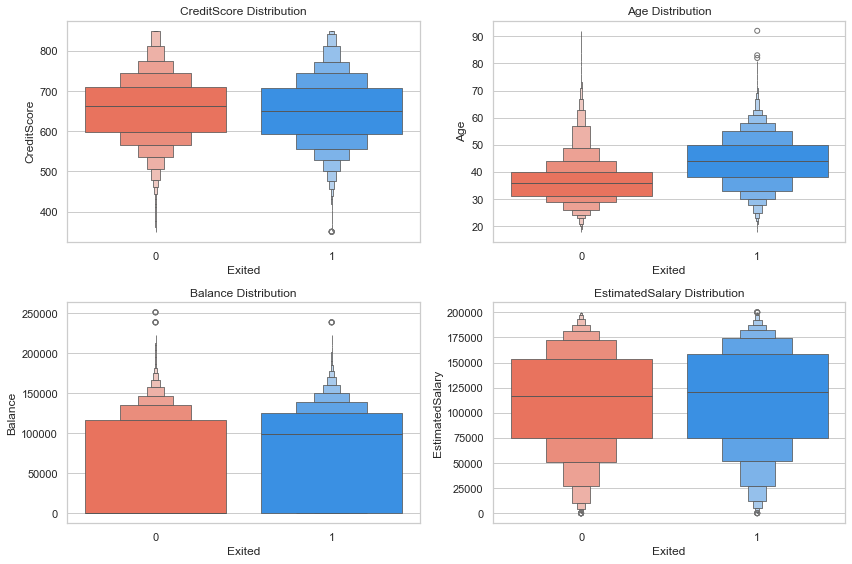

In [78]:
# Definir los colores deseados para cada valor de la variable objetivo
colors = ['#FF6347', '#1E90FF']  

# # Necesitamos separar las columnas de valores continuos de las columnas de valores discretos para facilitar la visualización de los datos.
cont_col = df_train[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']]

fig, axes = plt.subplots(nrows=len(cont_col.columns) // 2, ncols=2, figsize=(12, 8))
for idx, column in enumerate(cont_col):
    row_idx = idx // 2
    col_idx = idx % 2
    sns.boxenplot(x='Exited', y=column, data=df_train, ax=axes[row_idx, col_idx], palette=colors)
    axes[row_idx, col_idx].set_xlabel('Exited')
    axes[row_idx, col_idx].set_ylabel(column)
    axes[row_idx, col_idx].set_title(f"{column} Distribution")
plt.tight_layout()
plt.show()


Los gráficos de cajas muestran la distribución de los valores, dividiendo los datos en cuartiles y representando los valores extremos. En este caso, los datos se dividen según si los clientes han abandonado el servicio o no. Esto nos permite comparar visualmente cómo se distribuyen estas variables entre los clientes que han abandonado y los que no.

* Variables categoricas

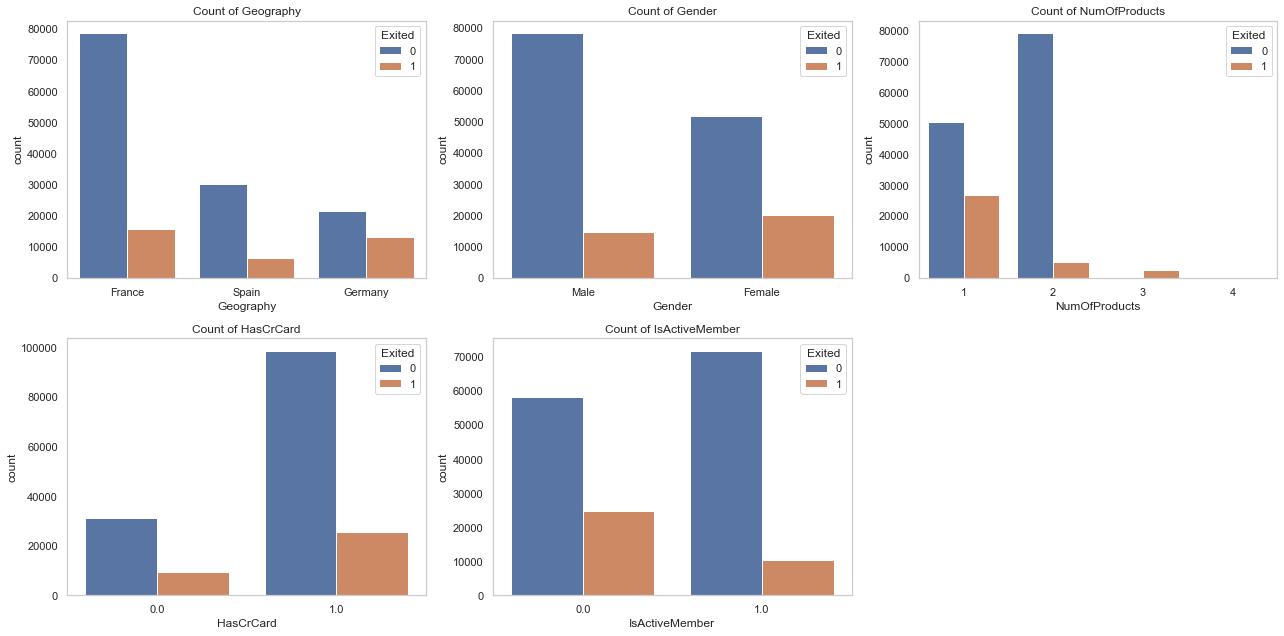

In [79]:
other_col = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

# Configurar la figura y los ejes
fig = plt.figure(figsize=(18, 9))

# Iterar sobre las columnas
for i, col in enumerate(other_col, 1):
    ax = fig.add_subplot(2, 3, i)
    sns.countplot(data=df_train, x=col, hue='Exited', ax=ax)
    ax.set_title('Count of {}'.format(col))
    ax.grid(False)

plt.tight_layout()
plt.show()


 Some insights:

**1. Tasa de abandono por país:**

* **Francia y España:** Observamos una tasa de abandono mayor en Francia y España en comparación con Alemania. Esto podría deberse a diversos factores, como:
    * **Diferencias en el mercado:** Las preferencias del consumidor, la competencia o las estrategias de marketing podrían variar entre los países.
    * **Factores económicos:** Las condiciones económicas en cada país podrían influir en la capacidad de los usuarios para pagar por el producto o servicio.
    * **Barreras del idioma:** Si el producto o servicio no está adaptado al idioma local, esto podría dificultar su uso y aumentar la tasa de abandono.

**2. Tasa de abandono por género:**

* **Desequilibrio a favor de los hombres:** Aunque existe un pequeño desequilibrio de género en la base de usuarios, la tasa de abandono es relativamente mayor entre los hombres que entre las mujeres. Esto podría deberse a:
    * **Diferentes necesidades e intereses:** Las necesidades e intereses de hombres y mujeres podrían ser diferentes, lo que podría afectar su uso del producto o servicio y su probabilidad de abandonarlo.
    * **Factores culturales:** Las normas culturales o las expectativas de género podrían influir en la forma en que los hombres y las mujeres utilizan la tecnología.
    * **Estrategias de marketing:** Las estrategias de marketing podrían estar dirigidas principalmente a hombres, lo que podría generar una mayor proporción de usuarios masculinos que abandonan.

**3. Tasa de abandono por cantidad de productos:**

* **Mayor abandono con dos productos:** Los usuarios que poseen dos productos presentan la mayor tasa de abandono. Esto podría indicar:
    * **Insatisfacción con los productos:** Es posible que los usuarios no estén satisfechos con ambos productos o que no encuentren valor en tener dos productos.
    * **Complejidad de uso:** La gestión de dos productos podría ser compleja para algunos usuarios, lo que podría llevarlos a abandonar uno o ambos.
    * **Estrategias de precios:** Los precios de los productos podrían ser demasiado altos para algunos usuarios, especialmente si tienen dos productos.

**4. Tasa de abandono por posesión de tarjeta:**

* **Mayor abandono entre usuarios con tarjeta:** Los usuarios que poseen una tarjeta de crédito presentan una mayor tasa de abandono en comparación con aquellos que no la poseen. Esto podría deberse a:
    * **Mayor facilidad de cancelación:** Los usuarios con tarjeta de crédito pueden cancelar sus suscripciones o pagos con mayor facilidad, lo que podría llevar a un mayor abandono.
    * **Impulsividad:** El uso de tarjetas de crédito puede fomentar compras impulsivas, lo que podría llevar a arrepentimiento y abandono posterior.
    * **Problemas de facturación:** Los usuarios con tarjeta de crédito podrían experimentar problemas de facturación, lo que podría generar frustración y abandono.

**5. Tasa de abandono por estado del servicio:**

* **Paradoja del servicio activo:** Observamos que los usuarios con servicio activo tienen una tasa de abandono mayor que aquellos que no lo poseen. Esto podría deberse a:
    * **Expectativas no cumplidas:** Los usuarios con servicio activo podrían tener expectativas más altas que no se cumplen, lo que lleva a la frustración y al abandono.
    * **Problemas técnicos:** Los usuarios con servicio activo podrían experimentar más problemas técnicos, lo que podría generar insatisfacción y abandono.
    * **Falta de uso:** Es posible que algunos usuarios con servicio activo no utilicen el servicio con frecuencia, lo que podría llevarlos a considerarlo innecesario y abandonarlo.

* Entendiendo la Antigüedad

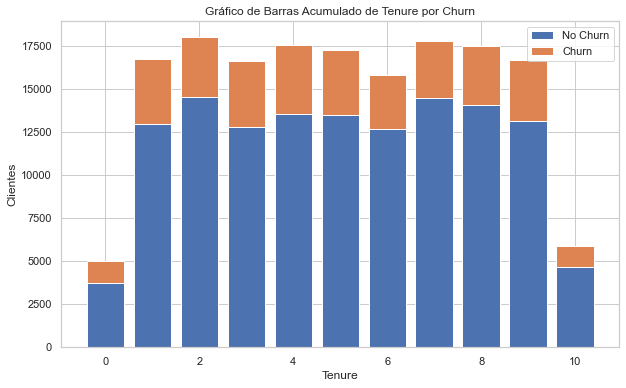

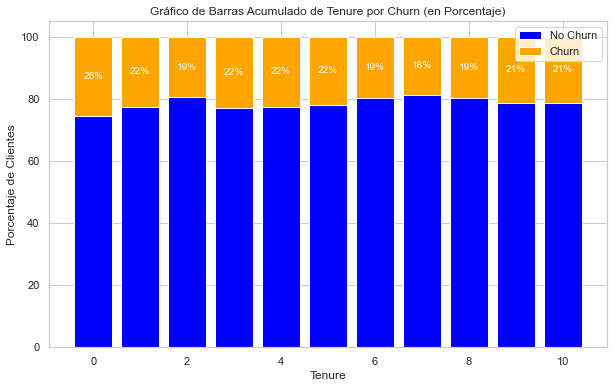

In [80]:
# Crear columnas para las dos series
valores_1 = df_train.loc[df_train['Exited'] == 0, 'Tenure'].value_counts().sort_index()
valores_2 = df_train.loc[df_train['Exited'] == 1, 'Tenure'].value_counts().sort_index()

# Alinear los índices
valores_1, valores_2 = valores_1.align(valores_2, fill_value=0)

# Crear el gráfico de barras acumulado
plt.figure(figsize=(10, 6))
plt.bar(valores_1.index, valores_1, label='No Churn')
plt.bar(valores_2.index, valores_2, bottom=valores_1, label='Churn')

# Añadir etiquetas y título
plt.xlabel('Tenure')
plt.ylabel('Clientes')
plt.title('Gráfico de Barras Acumulado de Tenure por Churn')
plt.legend()

# Mostrar el gráfico
plt.show()

# Mostrar el gráfico
plt.show()

# Crear columnas para las dos series
valores_1 = df_train.loc[df_train['Exited'] == 0, 'Tenure'].value_counts().sort_index()
valores_2 = df_train.loc[df_train['Exited'] == 1, 'Tenure'].value_counts().sort_index()

# Alinear los índices
valores_1, valores_2 = valores_1.align(valores_2, fill_value=0)

# Calcular los porcentajes
total = valores_1 + valores_2
porcentaje_no_churn = (valores_1 / total) * 100
porcentaje_churn = (valores_2 / total) * 100

# Crear el gráfico de barras acumulado
plt.figure(figsize=(10, 6))
plt.bar(porcentaje_no_churn.index, porcentaje_no_churn, label='No Churn', color='blue')
bars_churn = plt.bar(porcentaje_churn.index, porcentaje_churn, bottom=porcentaje_no_churn, label='Churn', color='orange')

# Añadir etiquetas y título
plt.xlabel('Tenure')
plt.ylabel('Porcentaje de Clientes')
plt.title('Gráfico de Barras Acumulado de Tenure por Churn (en Porcentaje)')
plt.legend()

# Añadir etiquetas a las barras de churn
for bar in bars_churn:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_y() + height / 2,
        f'{int(height)}%',
        ha='center',
        va='center',
        color='white',
        fontsize=10
    )

# Mostrar el gráfico
plt.show()


La cantidad de clientes tiende a ser más alta en los intervalos de 2, 4, 7 y 8 meses, disminuyendo ligeramente en los extremos.
Aunque hay variaciones en el número total de clientes en cada intervalo, se puede observar que la tasa de churn (proporción de clientes que se han dado de baja) varía según la antigüedad, siendo notablemente más alta en año zero y luego estabilizándose (entre 18% y 21%).

* Correlación

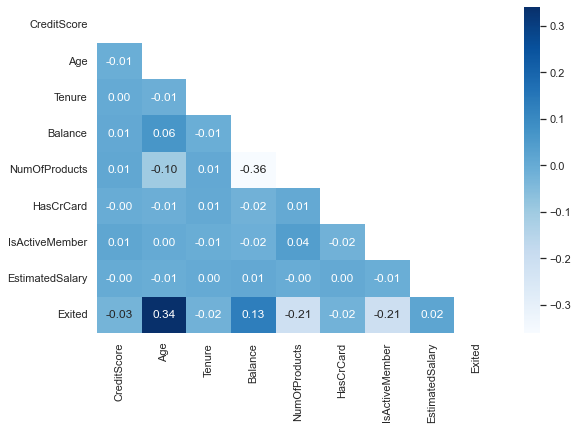

In [81]:
corr = df_train.corr(numeric_only=True)
mask = np.triu(corr)
plt.figure(figsize=(9, 6))
sns.heatmap(corr, annot=True,mask=mask, cmap='Blues', fmt='.2f')
plt.show()

Se puede visualizar que no hay indicios de multicolinealidad. En efecto, el conjunto de datos no presenta ninguna correlación significativa entre las variables independientes.

### Paso 4: Preprocesamiento

* Outliers

In [82]:
continues_variable = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

# Calcular IQR manualmente y encontrar valores atípicos
for col in continues_variable:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    outliers = df_train[(df_train[col] < lower_limit) | (df_train[col] > upper_limit)][col]
    
    print(f'Columna: {col}, Valores atípicos: {outliers.tolist()}')


Columna: CreditScore, Valores atípicos: [413, 359, 415, 427, 367, 420, 411, 424, 399, 411, 426, 425, 408, 405, 420, 401, 416, 425, 408, 413, 363, 422, 425, 367, 427, 416, 424, 350, 418, 350, 404, 425, 427, 426, 420, 350, 417, 350, 376, 408, 405, 367, 420, 427, 405, 376, 350, 427, 425, 427, 426, 363, 418, 367, 365, 410, 426, 414, 422, 424, 427, 350, 418, 419, 422, 416, 426, 411, 421, 415, 401, 425, 405, 350, 411, 376, 404, 427, 405, 411, 408, 376, 386, 425, 414, 427, 411, 422, 427, 383, 425, 418, 350, 427, 411, 418, 414, 411, 418, 427, 367, 411, 425, 410, 405, 426, 363, 412, 410, 420, 350, 424, 413, 414, 350, 420, 408, 350, 413, 411, 411, 358, 418, 404, 414, 367, 422, 418, 421, 411, 418, 405, 423, 382, 422, 411, 425, 350, 418, 421, 425, 424, 422, 414, 414, 410, 416, 420, 411, 411, 416, 422, 350, 415, 418, 411, 421, 425, 376, 363, 350, 426, 426, 383, 426, 411, 411, 425, 422, 415, 418, 424, 365, 405, 373, 411, 420, 350, 367, 408, 411, 427, 418, 412, 426, 350, 405, 426, 399, 405, 414, 412,

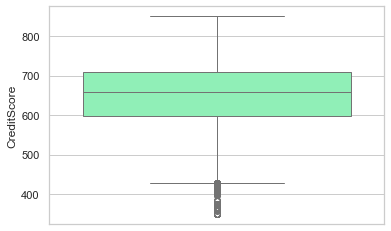

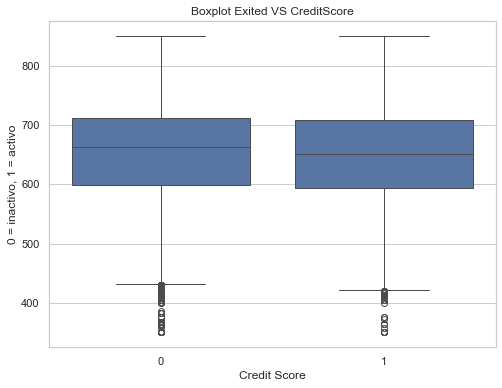

In [83]:
boxplot_credit = sns.boxplot(y=df_train['CreditScore'], palette="rainbow")

# Configurar el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Crear un boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x="Exited", y="CreditScore", data=df_train)

# Añadir etiquetas y título
plt.xlabel("Credit Score")
plt.ylabel("0 = inactivo, 1 = activo")
plt.title("Boxplot Exited VS CreditScore")

# Mostrar el gráfico
plt.show()

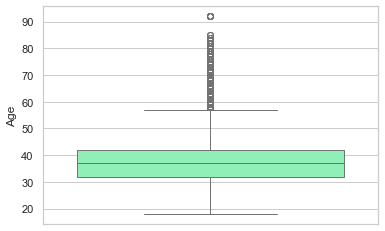

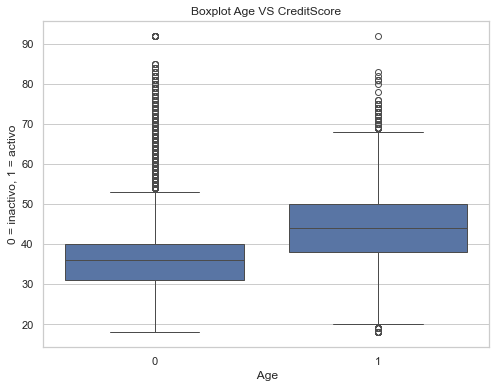

In [84]:
boxplot_age = sns.boxplot(y=df_train['Age'], palette="rainbow")

# Configurar el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Crear un boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x="Exited", y="Age", data=df_train)

# Añadir etiquetas y título
plt.xlabel(" Age")
plt.ylabel("0 = inactivo, 1 = activo")
plt.title("Boxplot Age VS CreditScore")

# Mostrar el gráfico
plt.show()

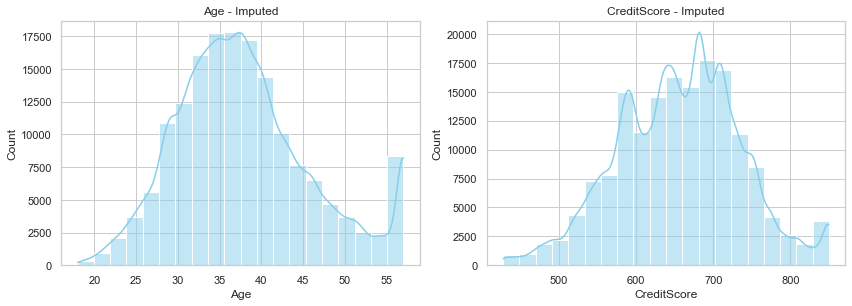

In [85]:
def replace_outliers_with_thresholds(train_data, test_data, column):
    # Calcula los límites de los valores atípicos basados en el rango intercuartílico (IQR) de los datos de entrenamiento
    Q1_train = train_data[column].quantile(0.25)
    Q3_train = train_data[column].quantile(0.75)
    IQR_train = Q3_train - Q1_train
    lower_limit_train = Q1_train - 1.5 * IQR_train
    upper_limit_train = Q3_train + 1.5 * IQR_train
    
    # Imputa los valores atípicos en los datos de entrenamiento
    train_data.loc[(train_data[column] < lower_limit_train), column] = lower_limit_train
    train_data.loc[(train_data[column] > upper_limit_train), column] = upper_limit_train
    
    # Calcula los límites de los valores atípicos basados en el rango intercuartílico (IQR) de los datos de prueba
    Q1_test = test_data[column].quantile(0.25)
    Q3_test = test_data[column].quantile(0.75)
    IQR_test = Q3_test - Q1_test
    lower_limit_test = Q1_test - 1.5 * IQR_test
    upper_limit_test = Q3_test + 1.5 * IQR_test
    
    # Imputa los valores atípicos en los datos de prueba
    test_data.loc[(test_data[column] < lower_limit_test), column] = lower_limit_test
    test_data.loc[(test_data[column] > upper_limit_test), column] = upper_limit_test

# Lista de columnas para imputar valores atípicos
columns_to_impute = ['Age', 'CreditScore']

# Imputar valores atípicos en ambos DataFrames para cada columna
for column in columns_to_impute:
    replace_outliers_with_thresholds(df_train, df_test, column)

# Visualización de las distribuciones de las variables numéricas antes y después de la imputación
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_to_impute):
    plt.subplot(2, len(columns_to_impute), i + 1)
    sns.histplot(df_train[col], kde=True, color='skyblue', bins=20)
    plt.title(f'{col} - Imputed')

plt.tight_layout()
plt.show()

Se ha observado que los valores atípicos son parte de la naturaleza de los datos, como el envejecimiento de algunos usuarios. Procederemos a imputar los datos utilizando el rango intercuartílico, ya que ha sido la mejor opción para manejar los valores atípicos y preservar la estructura de los datos.

* Simetria

In [86]:
# # Realizamos el calculo de semetria
# from scipy.stats import skew
# number = list(df_train.select_dtypes(include=np.number).columns)

# # Un valor de 0 indica simetría, un valor negativo indica asimetría negativa, y un valor positivo indica asimetría positiva.
# for index, col in enumerate(number, 1):
#     print(col, skew(df_train[col]))

Resultados de Simetría
* CreditScore: -0.0482 (cerca de 0, no necesita transformación)
* Age: 0.5281 (ligeramente sesgada positivamente)
* Tenure: 0.0065 (cerca de 0, no necesita transformación)
* Balance: 0.3820 (ligeramente sesgada positivamente)
* IsActiveMember: 0.0089 (cerca de 0, no necesita transformación)
* EstimatedSalary: -0.3090 (ligeramente sesgada negativamente)

In [87]:
# # Transformación de los datos basada en la simetría
# from sklearn.preprocessing import PowerTransformer

# columns_to_transform = ['Age', 'Balance', 'EstimatedSalary']

# transformer = PowerTransformer()
# df_train[columns_to_transform] = transformer.fit_transform(df_train[columns_to_transform])

# df_test[columns_to_transform] = transformer.transform(df_test[columns_to_transform])

# # Visualización de las distribuciones de las variables numéricas antes y después de la transformación
# plt.figure(figsize=(15, 10))
# for i, col in enumerate(columns_to_transform):
#     plt.subplot(2, len(columns_to_transform), i + 1)
#     sns.histplot(df_train[col], kde=True, color='skyblue', bins=20)
#     plt.title(f'{col} - Original')

# plt.tight_layout()
# plt.show()

In [88]:
# from scipy import stats

# # Aplicar transformaciones basadas en la simetría
# # Transformación logarítmica para "Age"
# df_train['Age_log'] = np.log1p(df_train['Age'])

# # Transformación inversa para "HasCrCard" (se puede ajustar según la naturaleza de los datos)
# df_train['HasCrCard_inv'] = 1 / (df_train['HasCrCard'] + 1e-9)  # Añadir un pequeño valor para evitar división por cero

# # Aplicar las mismas transformaciones al conjunto de prueba
# df_test['Age_log'] = np.log1p(df_test['Age'])
# df_test['HasCrCard_inv'] = 1 / (df_test['HasCrCard'] + 1e-9)  # Añadir un pequeño valor para evitar división por cero


In [89]:
# Aplicar el mapeo a la columna 'Categoria' usando map() con el diccionario de mapeo
df_train['Gender'] = df_train['Gender'].map({'Female': 0, 'Male': 1})
df_test['Gender'] = df_test['Gender'].map({'Female': 0, 'Male': 1})

# Division del DF en variables de entrada y salida 

In [90]:
# Aplicar codificación one-hot a las variables categóricas
df_train_dummies = pd.get_dummies(df_train, columns=['Geography'], dtype=int)
df_test_dummies  = pd.get_dummies(df_test, columns=['Geography'], dtype=int)

# Asegurarse de que las columnas de one-hot encoding sean consistentes entre train y test
df_test_dummies = df_test_dummies.reindex(columns=df_train_dummies.columns, fill_value=0)

# Separar las características y la variable objetivo
X_train = df_train_dummies.drop(columns='Exited')
y_train = df_train_dummies['Exited']
X_test = df_test_dummies.drop(columns='Exited')
y_test = df_test_dummies['Exited']

# Dividir el conjunto de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### Seleccion del modelo

Se define las puntuaciones del modelo

In [91]:
def plot_roc_curve(fpr, tpr, label = None):
    
    plt.plot(fpr, tpr, linewidth = 2, label= 'auc= '+ str(label))
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate(Recall)")
    plt.title("ROC Curve")
    plt.axis([0, 1, 0, 1])
    plt.legend(loc=4)
    plt.show()

In [92]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(target_test,target_pred):
    conf=confusion_matrix(target_test,target_pred)
    plot=ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=['Not exited', 'Exited'])
    plot.plot()
    plt.show()

In [93]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.linear_model import SGDClassifier, RidgeClassifier, LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC

model_name=[]
accuracy=[]
roc_auc=[]
F1_score=[]
models=[
    # Tree models, boosting
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    ExtraTreesClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    # Linear models
    SGDClassifier(random_state=42),
    RidgeClassifier(random_state=42),
    LogisticRegression(random_state=42),
    # XGB, SVM
    XGBClassifier(random_state=42),
    SVC(random_state=42, probability=True)  # Habilitar la probabilidad para SVC
]

for model in models:
    model.fit(X_train , y_train)
    prediction = model.predict(X_val)
    model_name.append(model.__class__.__name__)
    accuracy.append((accuracy_score(prediction , y_val) * 100))
    F1_score.append((f1_score(y_val, prediction) * 100))

    # Solo calcular roc_auc_score para modelos que proporcionan estimaciones de probabilidad
    if hasattr(model, "predict_proba"):
        y_predict = model.predict_proba(X_val)[:, 1]
        roc_auc.append((roc_auc_score(y_val , y_predict) * 100))
    else:
        roc_auc.append(None)

In [94]:
models_df = pd.DataFrame({"Model-Name":model_name, "Accuracy": accuracy ,'AUC':roc_auc ,'F1-Score':F1_score})

models_df.sort_values("AUC", ascending = False)

,Model-Name,Accuracy,AUC,F1-Score
2,GradientBoostingClassifier,86.584664,88.960112,63.179777
8,XGBClassifier,86.530130,88.851308,63.611066
4,AdaBoostClassifier,86.233223,88.128830,61.885590
1,RandomForestClassifier,85.763626,87.306149,61.511999
3,ExtraTreesClassifier,85.457630,86.762743,60.675078
7,LogisticRegression,79.152907,71.980486,23.790010
0,DecisionTreeClassifier,79.631593,70.275969,52.784606
9,SVC,78.928712,45.694966,0.000000
5,SGDClassifier,78.925682,NaN,0.057471
6,RidgeClassifier,83.615597,NaN,46.124726


Se trazar las métricas de rendimiento de los modelos

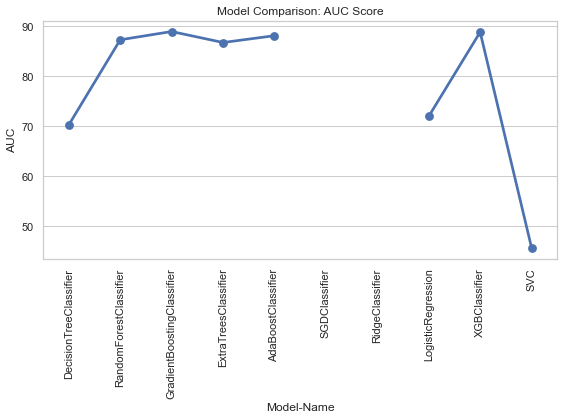

In [95]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model-Name',y='AUC',data=models_df)
plt.xticks(rotation=90)
plt.title('Model Comparison: AUC Score')
plt.tight_layout()
plt.show()

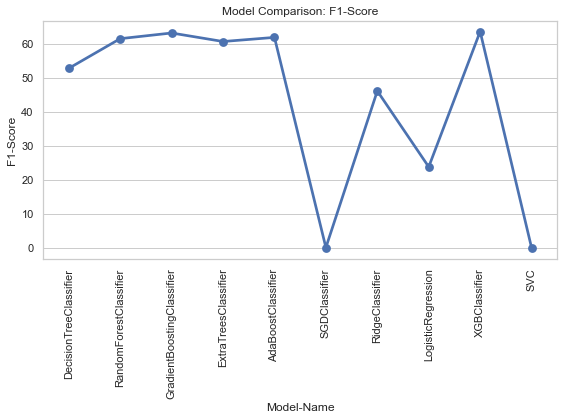

In [96]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model-Name',y='F1-Score',data=models_df)
plt.xticks(rotation=90)
plt.title('Model Comparison: F1-Score')
plt.tight_layout()
plt.show()

## Modelo final

Se entrena el modelo

In [97]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

# Aplicar submuestreo al conjunto de entrenamiento
rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

# Entrenar el modelo con los datos submuestreados
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train_res, y_train_res)

# Evaluar el modelo en el conjunto de validación
y_pred_val = gbc.predict(X_val)
y_pred_val_proba = gbc.predict_proba(X_val)[:, 1]

# Calcular métricas
roc_auc = roc_auc_score(y_val, y_pred_val_proba)
conf_matrix = confusion_matrix(y_val, y_pred_val)
class_report = classification_report(y_val, y_pred_val)

# Mostrar resultados
print(f"ROC AUC Score: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

ROC AUC Score: 0.8898
Confusion Matrix:
[[21069  4983]
 [ 1373  5582]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87     26052
           1       0.53      0.80      0.64      6955

    accuracy                           0.81     33007
   macro avg       0.73      0.81      0.75     33007
weighted avg       0.85      0.81      0.82     33007



In [98]:
from sklearn.model_selection import GridSearchCV

# Definir el espacio de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

# Configurar la búsqueda de grilla
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1, verbose=2)

# Ajustar la búsqueda de grilla a los datos submuestreados
grid_search.fit(X_train_res, y_train_res)

# Mejor modelo
best_model = grid_search.best_estimator_

# Evaluar el mejor modelo en el conjunto de validación
y_pred_val_best = best_model.predict(X_val)
y_pred_val_proba_best = best_model.predict_proba(X_val)[:, 1]

# Resultados del mejor modelo
roc_auc_best = roc_auc_score(y_val, y_pred_val_proba_best)
conf_matrix_best = confusion_matrix(y_val, y_pred_val_best)
class_report_best = classification_report(y_val, y_pred_val_best)

# Mostrar resultados
print(f"Best ROC AUC Score: {roc_auc_best:.4f}")
print("Best Confusion Matrix:")
print(conf_matrix_best)
print("Best Classification Report:")
print(class_report_best)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best ROC AUC Score: 0.8904
Best Confusion Matrix:
[[21053  4999]
 [ 1369  5586]]
Best Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87     26052
           1       0.53      0.80      0.64      6955

    accuracy                           0.81     33007
   macro avg       0.73      0.81      0.75     33007
weighted avg       0.85      0.81      0.82     33007



En general, aunque hubo una pequeña variación en la matriz de confusión, el desempeño general del modelo se mantiene similar antes y después del ajuste de hiperparámetros, con un ROC AUC Score bastante similar. Así que se mantendrá el modelo original. Se puede investigar e intentar mejorar el rendimiento del modelo actual, así como también probar otros modelos y generar nuevas características para explorar y potencialmente mejorar aún más el rendimiento del sistema.

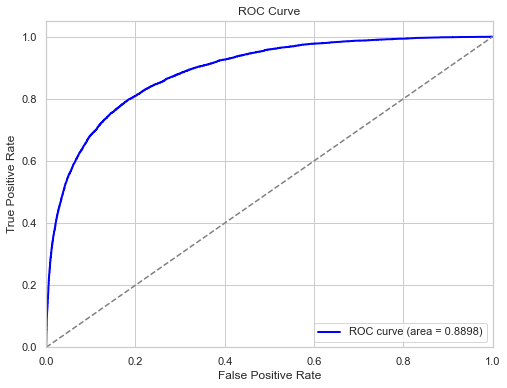

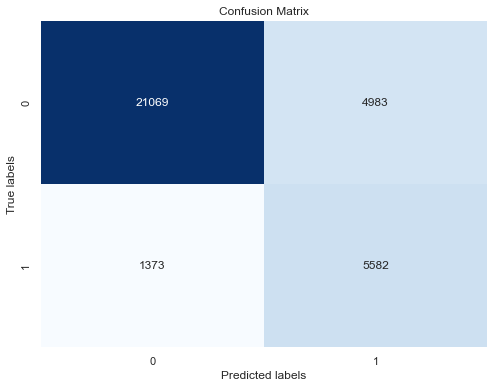

In [99]:
from sklearn.metrics import auc, roc_curve

def plot_roc_auc(y_true, y_proba):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Llama a las funciones con tus datos
plot_roc_auc(y_val, y_pred_val_proba)
plot_confusion_matrix(conf_matrix)
